# DAV 5400 Project 2 (M9)

### Part I : Working with HTML and JSON

In [93]:
import pandas as pd
import re
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

# Load the HTML and JSON files
html_df = pd.read_html("https://raw.githubusercontent.com/anagh3395/DAV5400/main/Module8/albums.html")[0]
json_df = pd.read_json("https://raw.githubusercontent.com/anagh3395/DAV5400/main/Module8/albums.json")

# Check if the two data frames are identical
if html_df.equals(json_df):
  print("The two data frames are identical.")
else:
  print("The two data frames are not identical.")

The two data frames are not identical.


In [94]:
html_df

,Album Title,Musical Artist,Songs/Tracks,Year Released
0,AM,Arctic Monkeys,"Do I Wanna Know?, Why'd You Only Call Me When ...",2013
1,Meteora,Linkin Park,"Numb, Somewhere I Belong, Faint, Breaking the ...",2003
2,Ghost Stories,Coldplay,"Magic, A Sky Full of Stars, Midnight, Oceans, ...",2014


In [95]:
json_df

,album_title,musical_artist,songs,year_released
0,AM,Arctic Monkeys,"[Do I Wanna Know?, Why'd You Only Call Me When...",2013
1,Meteora,Linkin Park,"[Numb, Somewhere I Belong, Faint, Breaking the...",2003
2,Ghost Stories,Coldplay,"[Magic, A Sky Full of Stars, Midnight, Oceans,...",2014


We see there is a difference in the structure of the songs column in both . One is a list and other is comma separated.

### Part II : Scraping the Katz School’s “Staff” Web Page

In [70]:
url = "https://www.yu.edu/katz/staff"
# Using the requests module, we use the "get" function
# provided to access the webpage provided as an
# argument to this function:
result = requests.get(url)

In [71]:
# To make sure that the website is accessible, we can
# ensure that we obtain a 200 OK response to indicate
# that the page is indeed present:
print(result.status_code)

200


In [72]:
# We can also check the HTTP header of the website to
# verify that we have indeed accessed the correct page:
print(result.headers)

{'Connection': 'keep-alive', 'Content-Length': '27782', 'Cache-Control': 'max-age=3600, public', 'Content-Encoding': 'gzip', 'Content-Language': 'en', 'Content-Type': 'text/html; charset=UTF-8', 'Etag': 'W/"1699816733"', 'Expires': 'Sun, 19 Nov 1978 05:00:00 GMT', 'Last-Modified': 'Sun, 12 Nov 2023 19:18:53 GMT', 'Server': 'nginx', 'X-Content-Type-Options': 'nosniff', 'X-Drupal-Cache': 'HIT', 'X-Drupal-Dynamic-Cache': 'MISS', 'X-Frame-Options': 'SAMEORIGIN', 'X-Generator': 'Drupal 9 (https://www.drupal.org)', 'X-Pantheon-Styx-Hostname': 'styx-fe2-a-6d4f8f8c4-9kksm', 'X-Styx-Req-Id': '59186377-8190-11ee-9928-929bb26d6c54', 'X-Ua-Compatible': 'IE=edge', 'Date': 'Mon, 13 Nov 2023 01:18:08 GMT', 'X-Served-By': 'cache-chi-kigq8000032-CHI, cache-ewr18172-EWR', 'X-Cache': 'HIT, HIT', 'X-Cache-Hits': '1, 1', 'X-Timer': 'S1699838289.746422,VS0,VE2', 'Vary': 'Accept-Encoding, Cookie, Cookie, Cookie', 'Age': '2853', 'Accept-Ranges': 'bytes', 'Via': '1.1 varnish, 1.1 varnish'}


In [73]:
# Now, let us store the page content of the website accessed
# from requests to a variable:
src = result.content

In [74]:
# Now that we have the page source stored, we will use the
# BeautifulSoup module to parse and process the source.
# To do so, we create a BeautifulSoup object based on the
# source variable we created above:
soup = BeautifulSoup(src, 'html.parser')

In [75]:
staff = soup.find_all("div",class_="text-only")

In [76]:
staff

[<div class="text-only">
 <div class="field field--name-field-paragraph-body"><h3>Office of the Dean </h3>
 <p>Paul Russo, Vice Provost and Dean <br/>
 Professor of Data Science<br/><a href="/faculty/pages/russo-paul">Read Dr. Russo's Biography</a> </p>
 <p>Aaron Ross, Assistant Dean for Academic Programs and Deputy to the Dean <br/><a href="mailto:Aaron.Ross2@yu.edu">aaron.ross2@yu.edu</a> | 646-592-4148  <br/>
  <br/>
 Sofia Binioris, Director of Communications and Strategic Initiatives<br/><a href="mailto:Sofia.Binioris@yu.edu">sofia.binioris@yu.edu</a> | 645-592-4719</p>
 <p>Jackie Hamilton, Executive Director of Enrollment Management and Partnerships<br/><a href="mailto:jackie.hamilton@yu.edu">jackie.hamilton@yu.edu</a> I 646-787-6194</p>
 <p>Pamela Rodman, Director of Finance and Administration<br/><a href="mailto:pamela.rodman@yu.edu">pamela.rodman@yu.edu</a> I 646.592.4777</p>
 <p>Tabitha Collazo, Business and Operations Coordinator<br/><a href="mailto:tabitha.collazo@yu.edu">t

In [41]:
def extract_names(staff):
    names = []

    for name in staff[0].find_all('p'):
        name_text = name.get_text()
        name_parts = name_text.split('\xa0\n\xa0\n')

        if len(name_parts) == 1:
            name_parts = name_parts[0].split(',')
            if name_parts[0] != '\xa0':
                names.append(name_parts[0])
        else:
            for name_part in name_parts:
                name_part = name_part.split(',')
                if name_part[0] != '\xa0':
                    names.append(name_part[0])

    # Filter out empty strings and '\xa0' characters
    names = list(filter(lambda x: len(x) > 0 and x != '\xa0', names))

    return names

In [43]:
names = extract_names(staff)
names

['Paul Russo',
 'Aaron Ross',
 'Sofia Binioris',
 'Jackie Hamilton',
 'Pamela Rodman',
 'Tabitha Collazo',
 'Ann Leary',
 'Jared Hakimi',
 'Xavier Velasquez',
 'Shayna Matzner',
 'Linyu Zheng',
 'Hyokyeong "Kyeong" Yu',
 'Rafael Reyes',
 'John Vivolo',
 'Nebahat Bayrakcioglu',
 'Gladys Davis',
 'Ariana Allias',
 'Lloyd Carew-Reid',
 'Denton Field']

In [78]:
def extract_emails(staff):
    emails = []

    for email in staff[0].find_all('p'):
        for a in email.find_all('a'):
            emails.append(a.text)

    # Filter out 'Schedule an Appointment' links
    emails = list(filter(lambda x: 'Schedule an Appointment' not in x, emails))

    # Validate email addresses using a regular expression
    email_pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    emails = list(map(lambda x: x if re.match(email_pattern, x) else 'NA', emails))

    return emails

In [79]:
emails = extract_emails(staff)
emails

['NA',
 'aaron.ross2@yu.edu',
 'sofia.binioris@yu.edu',
 'jackie.hamilton@yu.edu',
 'pamela.rodman@yu.edu',
 'tabitha.collazo@yu.edu',
 'ann.leary@yu.edu',
 'jared.hakimi@yu.edu',
 'xavier.velasquez@yu.edu',
 'shayna.matzner@yu.edu',
 'linyu.zheng@yu.edu',
 'hyokyeong.yu@yu.edu',
 'rafael.reyes@yu.edu',
 'john.vivolo@yu.edu',
 'nebahat.bayrakcioglu@yu.edu',
 'gladys.davis@yu.edu',
 'ariana.allias@yu.edu',
 'lloyd.carew-reid@yu.edu',
 'denton.field@yu.edu']

In [80]:
titles = []

# Iterate over the paragraphs in the staff section
i = 0
for row in staff[0].find_all('p'):
    # Get the text content of the paragraph
    row_text = row.get_text()

    # Split the paragraph text into parts
    row_parts = row_text.split('\xa0\n\xa0\n')

    # Skip empty paragraphs
    if row_parts == ['\xa0']:
        continue

    # Handle paragraphs with a single line
    if len(row_parts) == 1:
        # Extract the title from the first line
        title = row_parts[0].split(',')[1].split(emails[i])[0].strip()
        titles.append(title)

        # Increment the index for the next paragraph
        i += 1
    else:
        # Handle paragraphs with multiple lines
        for part in row_parts:
            # Extract the title from each line
            title = part.split(',')[1].split(emails[i])[0].strip()
            titles.append(title)

            # Increment the index for the next title
            i += 1

In [81]:
titles

["Vice Provost and Dean\xa0\nProfessor of Data ScienceRead Dr. Russo's Biography",
 'Assistant Dean for Academic Programs and Deputy to the Dean',
 'Director of Communications and Strategic Initiatives',
 'Executive Director of Enrollment Management and Partnerships',
 'Director of Finance and Administration',
 'Business and Operations Coordinator',
 "Office Manager/Executive Assistant to the Dean's Office",
 'Director',
 'Associate Director of Graduate Admissions Operations',
 'Assistant Director',
 'Assistant Director',
 'International Student Advisor',
 'Director of Graduate Student Life and Community Engagement',
 'Executive Director of Academic Operations and Teaching and Learning',
 'Academic Program Coordinator',
 'Academic Program Coordinator',
 'Program Manager',
 'Instructional Designer',
 'Media Production Manager']

In [82]:
# Define a regular expression for phone numbers
phone_regex = r'(\+\d{1,3}\s?)?(\d{3}[-\s]?\d{3}[-\s]?\d{4})'

# Initialize a list to store extracted phone numbers
phone_numbers = []

# Iterate over the paragraphs in the staff section
i = 0
for row in staff[0].find_all('p'):
    # Get the text content of the paragraph
    row_text = row.get_text()

    # Split the paragraph text into parts
    row_parts = row_text.split('\xa0\n\xa0\n')

    # Skip empty paragraphs
    if row_parts == ['\xa0']:
        continue

    # Handle paragraphs with a single line
    if len(row_parts) == 1:
        # Apply the regular expression to find phone numbers
        phone_matches = re.findall(phone_regex, row_parts[0])

        # If a phone number is found, extract and append it to the list
        if phone_matches:
            phone_numbers.append(phone_matches[0][1])
        else:
            # If no phone number is found, append "NA" to indicate no phone number
            phone_numbers.append("NA")

        # Increment the index for the next paragraph
        i += 1
    else:
        # Handle paragraphs with multiple lines
        for part in row_parts:
            # Apply the regular expression to find phone numbers
            phone_matches = re.findall(phone_regex, part)

            # If a phone number is found, extract and append it to the list
            if phone_matches:
                phone_numbers.append(phone_matches[0][1])
            else:
                # If no phone number is found, append "NA" to indicate no phone number
                phone_numbers.append("NA")

            # Increment the index for the next title
            i += 1

In [83]:
phone_numbers

['NA',
 '646-592-4148',
 '645-592-4719',
 '646-787-6194',
 'NA',
 '646-592-4735',
 '646-592-4724',
 '646-592-4722',
 '646-592-4737',
 '646-592-4726',
 '332-271-5865',
 '646-592-4736',
 '646-592-4729',
 '646-592-4743',
 '646-592-4034',
 '646-592-4762',
 'NA',
 '646-592-4768',
 'NA']

In [84]:
departments = staff[0].find_all('h3')
offices = [d.get_text().strip() for d in departments]
offices

['Office of the Dean',
 'Graduate Admissions',
 'Graduate Student Life',
 'Academic Operations and Teaching and Learning']

In [85]:
# Create a DataFrame with the extracted staff information
staff_info = pd.DataFrame({
    "name": names,
    "title": titles,
    "email": emails,
    "phone": phone_numbers
})

# Add a new column for the office 
staff_info['office'] = ''

# Assign office to the corresponding staff members
staff_info.loc[:6, 'office'] = offices[0]
staff_info.loc[7:11, 'office'] = offices[1]
staff_info.loc[12, 'office'] = offices[2]
staff_info.loc[13:, 'office'] = offices[3]

staff_info

,name,title,email,phone,office
0,Paul Russo,Vice Provost and Dean \nProfessor of Data Scie...,NA,NA,Office of the Dean
1,Aaron Ross,Assistant Dean for Academic Programs and Deput...,aaron.ross2@yu.edu,646-592-4148,Office of the Dean
2,Sofia Binioris,Director of Communications and Strategic Initi...,sofia.binioris@yu.edu,645-592-4719,Office of the Dean
3,Jackie Hamilton,Executive Director of Enrollment Management an...,jackie.hamilton@yu.edu,646-787-6194,Office of the Dean
4,Pamela Rodman,Director of Finance and Administration,pamela.rodman@yu.edu,NA,Office of the Dean
5,Tabitha Collazo,Business and Operations Coordinator,tabitha.collazo@yu.edu,646-592-4735,Office of the Dean
6,Ann Leary,Office Manager/Executive Assistant to the Dean...,ann.leary@yu.edu,646-592-4724,Office of the Dean
7,Jared Hakimi,Director,jared.hakimi@yu.edu,646-592-4722,Graduate Admissions
8,Xavier Velasquez,Associate Director of Graduate Admissions Oper...,xavier.velasquez@yu.edu,646-592-4737,Graduate Admissions
9,Shayna Matzner,Assistant Director,shayna.matzner@yu.edu,646-592-4726,Graduate Admissions


### Part III : Working with Web API’s

In [25]:
class NewsDataInterface:
    def get_news_data(self, api_key, api_type):
        raise NotImplementedError

    def get_news_data_dataframe(self, api_key, api_type, start_date=None, end_date=None):
        """
        Gets news data from the newsdata.io API and converts it into a Pandas DataFrame.

        Args:
            api_key (str): The newsdata.io API key.
            api_type (str): The API type to use. Valid values are 'Live Breaking News' or 'Historical news'.
            start_date (str): The start date for historical news data. Format: YYYY-MM-DD.
            end_date (str): The end date for historical news data. Format: YYYY-MM-DD.
            If start_date and end_date are not specified, then live breaking news data will be returned.

        Returns:
            pandas.DataFrame: The news data as a Pandas DataFrame.
        """

        response_json = self._get_news_data_json(api_key, api_type, start_date, end_date)

        return response_json

    def _get_news_data_json(self, api_key, api_type, start_date=None, end_date=None):
        raise NotImplementedError

class LiveBreakingNewsInterface(NewsDataInterface):
    def get_news_data(self, api_key):
        return self.get_news_data_dataframe(api_key, 'Live Breaking News')

    def _get_news_data_json(self, api_key, api_type, start_date=None, end_date=None):
        url = f'https://newsdata.io/api/1/news?apikey={api_key}&q={api_type}'
        response = requests.get(url)
        response_json = response.json()

        return response_json

class HistoricalNewsInterface(NewsDataInterface):
    def get_news_data(self, api_key, start_date, end_date):
        return self.get_news_data_dataframe(api_key, 'Historical News', start_date, end_date)

    def _get_news_data_json(self, api_key, api_type, start_date=None, end_date=None):
        url = f'https://newsdata.io/api/1/news?apikey={api_key}&q={api_type}&startDate={start_date}&endDate={end_date}'
        response = requests.get(url)
        response_json = response.json()

        return response_json


This code defines an interface called NewsDataInterface with two methods: get_news_data() and get_news_data_dataframe(). The get_news_data() method takes two arguments: api_key and api_type. The get_news_data_dataframe() method takes four arguments: api_key, api_type, start_date, and end_date. The NewsDataInterface is an abstract class, which means that it cannot be instantiated. Instead, it is used to define the methods that must be implemented by subclasses.

The LiveBreakingNewsInterface and HistoricalNewsInterface classes are subclasses of the NewsDataInterface class. The LiveBreakingNewsInterface class overrides the get_news_data() method to get live breaking news data from the newsdata.io API. The HistoricalNewsInterface class overrides the get_news_data() method to get historical news data from the newsdata.io API for a specified date range.

The NotImplementedError exception is raised in the abstract class to indicate that the subclass must implement the method before it can be used. This is typically done in abstract classes, which are classes that are intended to be subclassed and used as a basis for other classes.

In [87]:
# Creating an instance 
interface = LiveBreakingNewsInterface()
df = interface.get_news_data('pub_327071312246efd309ca2628670298d48c6f2')
print(df)

{'status': 'success', 'totalResults': 784, 'results': [{'article_id': 'efe2b80d815730cd0ccddb27464dc49d', 'title': 'The Marvels implodes at the box office with $47 million payday (but still takes the top spot) in lowest weekend opening ever for an MCU film', 'link': 'https://www.dailymail.co.uk/tvshowbiz/article-12740631/The-Marvels-lives-low-expectations-takes-spot-box-office.html?ns_mchannel=rss&ns_campaign=1490&ito=1490', 'keywords': None, 'creator': None, 'video_url': None, 'description': 'The Marvels, the latest film in the Marvel Cinematic Universe lived up to low expectations for its box office debut, pulling in a mere $47 million.', 'content': "The Marvels implodes at the box office with $47 million payday (but still takes the top spot) in lowest weekend opening ever for an MCU film By Alesia Stanford For Dailymail.Com Published: 23:02, 12 November 2023 | Updated: 23:25, 12 November 2023 e-mail 6 View comments The Marvels, the latest film in the Marvel Cinematic Universe, lived

In [88]:
# Converting to dataframe
news = df['results']
df2= pd.DataFrame(news)
df2

,article_id,title,link,keywords,creator,video_url,description,content,pubDate,image_url,source_id,source_priority,country,category,language
0,efe2b80d815730cd0ccddb27464dc49d,The Marvels implodes at the box office with $4...,https://www.dailymail.co.uk/tvshowbiz/article-...,None,None,None,"The Marvels, the latest film in the Marvel Cin...",The Marvels implodes at the box office with $4...,2023-11-12 23:25:07,https://i.dailymail.co.uk/1s/2023/11/12/23/777...,dailymailuk,135,[united kingdom],[top],english
1,ef98569ef733f3141f6f74a7d442c98d,Landlord's shocking email to tenant after loss...,https://www.dailymail.co.uk/news/article-12740...,None,None,None,Landlords have gained the upper hand in the na...,Landlord's shocking email to tenant after loss...,2023-11-12 21:15:29,https://i.dailymail.co.uk/1s/2023/11/12/20/777...,dailymailuk,135,[united kingdom],[top],english
2,0128bce41eac457fa1c2c41a6825ffc8,Kosovo-Israel Match Kicks Off Amid High Securi...,https://www.rferl.org/a/kosovo-israel-soccer-g...,"[News, Kosovo]",None,None,The Israeli national soccer team’s match again...,PRISTINA -- The Israeli national soccer team’s...,2023-11-12 20:44:57,https://gdb.rferl.org/faaee304-8a9e-4236-94fa-...,rferl,275851,[tajikistan],[top],english
3,19c60104d0a8950b83d04261912b2b71,Neymar shows off bold new haircut as Brazil st...,https://www.dailystar.co.uk/sport/football/ney...,[Football],None,None,Neymar has left football fans in stitched with...,Brazilian superstar has showed off his bold ne...,2023-11-12 20:40:34,https://i2-prod.dailystar.co.uk/incoming/artic...,dailystar,3076,[united kingdom],[top],english
4,c769cf473a6fce8108fdaecfc8f729c6,Raheem Sterling fumes as Sky Sports reporter t...,https://www.dailystar.co.uk/sport/football/rah...,[Sport],None,None,England and Chelsea star Raheem Sterling wasn'...,A rogue reporter got a little too handsy with ...,2023-11-12 19:56:36,https://i2-prod.dailystar.co.uk/incoming/artic...,dailystar,3076,[united kingdom],[sports],english
5,d87172d0cc950404711c68411dee5b7b,‘Star Trek’ and ‘Batman’ director Robert Butle...,https://www.nme.com/news/tv/star-trek-and-batm...,None,[Elizabeth Aubrey],None,"""Few directors have changed the face of televi...","""Few directors have changed the face of televi...",2023-11-12 19:54:43,None,nme,305,[canada],[entertainment],english
6,5d1ccc46f591b7c18829e3bc48a22e0e,Ukrainian Delegation Arrives In Washington For...,https://www.rferl.org/a/ukraine-delegation-was...,"[News, Russia, Ukraine, Russia Invades Ukraine]",None,None,A Ukrainian delegation led by First Deputy Pri...,A Ukrainian delegation led by First Deputy Pri...,2023-11-12 19:30:42,https://gdb.rferl.org/1960a7eb-bc6d-41a2-94f8-...,rferl,275851,[tajikistan],[top],english
7,f26f8c098441ea8c41d1e9e03e3d0e6f,INPEFA® (sotagliflozin) Use Associated With Ea...,https://www.businesslend.com/press-release/inp...,[Press Release],[NewsVoir],None,Oral presentation delivered at the American He...,Oral presentation delivered at the American He...,2023-11-12 19:10:00,None,businesslend,716394,[india],[top],english
8,aaf4f0424496a850f9695bdb3dd7f5ae,Harry Styles confirmed to have shaved his head...,https://metro.co.uk/2023/11/12/harry-styles-co...,"[Entertainment, Showbiz, Harry Styles]",[Emily Bashforth],None,Fans are in shock.,"What’s that we can hear? Oh, just the sound of...",2023-11-12 19:07:18,None,metro,1797,[united kingdom],[entertainment],english
9,f06746ab6ea2ddbbb2b862768860e3a9,BBC Survivor host Joel Dommett's life off-scre...,https://www.mirror.co.uk/3am/celebrity-news/bb...,[3am],[mirrornews@mirror.co.uk (Nia Dalton)],None,BBC Survivor host Joel Dommett has welcomed hi...,TV personality Joel Dommett is a regular face ...,2023-11-12 19:00:00,https://i2-prod.mirror.co.uk/incoming/article3...,mirroruk,910,[united kingdom],[entertainment],english


In [89]:
df2.dtypes

article_id         object
title              object
link               object
keywords           object
creator            object
video_url          object
description        object
content            object
pubDate            object
image_url          object
source_id          object
source_priority     int64
country            object
category           object
language           object
dtype: object

We observe that most of our features are categorical . Some of the features contains a lot of text (like title and description ). The source_priority column is numerical and seems like a numerical representation of the priority of the source from which the article was obtained.

In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   article_id       10 non-null     object
 1   title            10 non-null     object
 2   link             10 non-null     object
 3   keywords         7 non-null      object
 4   creator          2 non-null      object
 5   video_url        0 non-null      object
 6   description      10 non-null     object
 7   content          10 non-null     object
 8   pubDate          10 non-null     object
 9   image_url        8 non-null      object
 10  source_id        10 non-null     object
 11  source_priority  10 non-null     int64 
 12  country          10 non-null     object
 13  category         10 non-null     object
 14  language         10 non-null     object
dtypes: int64(1), object(14)
memory usage: 1.3+ KB


Not all of the columns have data for all of the articles. For example, the keywords column has data for only 7 of the 10 articles, and the creator column has data for only 2 of the 10 articles. This suggests that some of the data may be missing or incomplete.

Text(0, 0.5, 'Count')

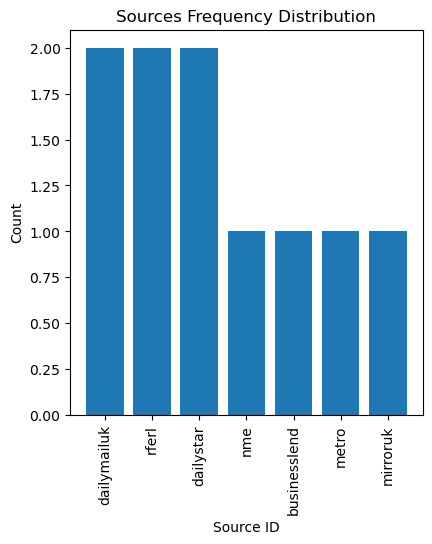

In [90]:
plt.figure(figsize=(10,5))
counts = df2['source_id'].value_counts()
plt.bar(counts.index, counts.values)
plt.xticks(rotation = 90)
# Set plot label and title
plt.title('Sources Frequency Distribution')
plt.xlabel('Source ID')
plt.ylabel('Count')


We see dailymailuk , rferl and dailystar have more articles 

TypeError: unhashable type: 'list'

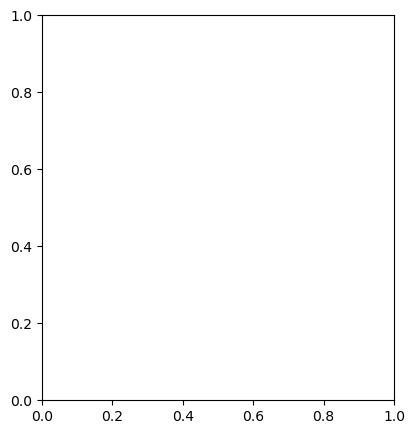

In [61]:
plt.figure(figsize=(10,5))
counts = df2['category'].value_counts()
plt.bar(counts.index, counts.values)
plt.xticks(rotation = 90)
# Set plot label and title
plt.title('Category distribution')
plt.xlabel('Category')
plt.ylabel('Count')

We tried to explore the category column but since it is a list we cannot do the analysis . Although we could convert this column in a way that identifies individual category which could be very benefical for the analysis.

In [62]:
df2.describe()

,source_priority
count,10.000000
mean,83915.300000
std,132453.468087
min,135.000000
25%,678.000000
50%,3076.000000
75%,207657.250000
max,275851.000000


<Axes: xlabel='source_priority', ylabel='Density'>

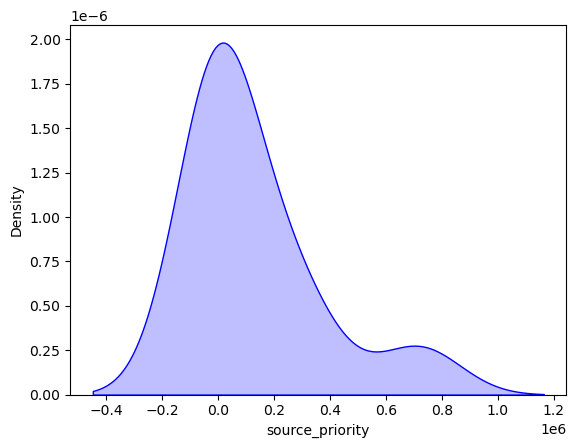

In [92]:
sns.kdeplot(x=df2['source_priority'],fill = True, color='b')

Overall, the distribution of source priorities in the dataset appears to be skewed towards higher priorities, with a few sources having very low or very high priorities. This suggests that the dataset may contain a mix of news articles from sources of varying reliability or importance.